In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [103]:
col=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df=pd.read_csv("./DSBDAL_Exam_DataSets/HeartDisease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [104]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [105]:
df1=df.dropna()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [106]:
df2=df.replace('?',pd.NA)
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [107]:
df=df2[df2>=0]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [108]:
df.std()

age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64

In [109]:
df.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [110]:
Out=np.abs((df-df.mean())/df.std())
lier=Out>3
print(lier.sum())
df=df[~lier.any(axis=1)]
df

age          0
sex          0
cp           0
trestbps     7
chol        13
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca          18
thal         7
target       0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [111]:
df.loc[df['sex']==1,'sex']='M'
df.loc[df['sex']==0,'sex']='F'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,M,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,M,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,M,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,F,0,110,254,0,0,159,0,0.0,2,0,2,1


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Logistic Regression

In [116]:
X=df.drop(['target'],axis=1)
Y=df['target']

In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [118]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
y_predict_lr=lr.predict(x_test)

# KNN

In [120]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [121]:
y_predict_knn=knn.predict(x_test)

# Comparison

In [122]:
acc1=metrics.accuracy_score(y_predict_lr,y_test)
acc3=metrics.accuracy_score(y_predict_knn,y_test)

In [123]:
print(acc1)
print(acc3)

0.9012345679012346
0.7119341563786008


In [124]:
y_predict_knn

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0], dtype=int64)

# Visualization

In [125]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  4.,  31., 106., 125., 113., 188., 212., 135.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

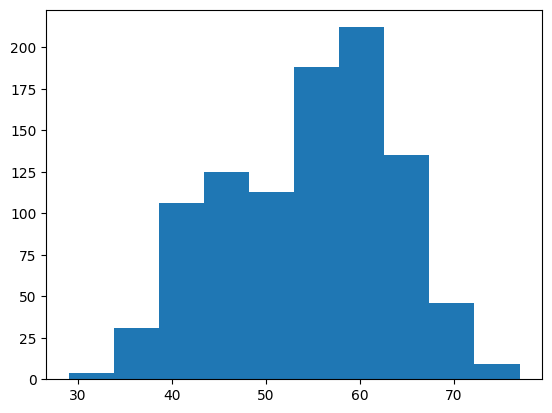

In [128]:
plt.hist(df['age'])

<AxesSubplot:>

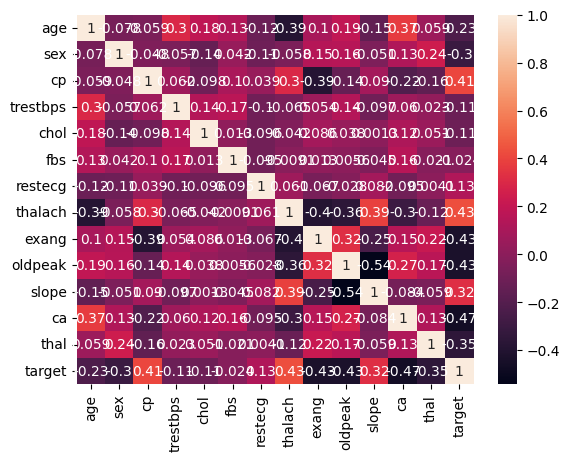

In [133]:
sns.heatmap(df.corr(),annot=True)

In [137]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 49, 48, 29, 37, 47, 68, 76,
       40, 39, 77, 69, 35, 38, 74], dtype=int64)

In [142]:
x2=[]
for c in df['age']:
    if (c>=60):
        x2.append(c)
x2

[70,
 61,
 62,
 71,
 60,
 67,
 63,
 61,
 70,
 64,
 65,
 61,
 66,
 66,
 60,
 67,
 66,
 67,
 61,
 63,
 62,
 68,
 62,
 63,
 62,
 65,
 76,
 62,
 61,
 63,
 60,
 61,
 60,
 66,
 60,
 64,
 63,
 61,
 63,
 77,
 77,
 64,
 63,
 64,
 60,
 63,
 64,
 69,
 67,
 60,
 62,
 64,
 66,
 62,
 67,
 65,
 63,
 64,
 66,
 60,
 64,
 60,
 62,
 67,
 60,
 62,
 64,
 66,
 71,
 66,
 64,
 71,
 64,
 71,
 61,
 67,
 60,
 62,
 61,
 70,
 74,
 64,
 63,
 66,
 70,
 63,
 60,
 60,
 65,
 66,
 62,
 66,
 67,
 62,
 66,
 64,
 77,
 64,
 63,
 63,
 66,
 68,
 66,
 63,
 71,
 70,
 61,
 70,
 62,
 65,
 67,
 65,
 60,
 67,
 62,
 60,
 66,
 65,
 69,
 69,
 61,
 67,
 60,
 64,
 65,
 62,
 65,
 61,
 64,
 68,
 71,
 61,
 60,
 61,
 67,
 61,
 62,
 69,
 60,
 65,
 63,
 76,
 64,
 62,
 70,
 67,
 68,
 69,
 67,
 65,
 60,
 60,
 70,
 62,
 64,
 61,
 74,
 63,
 70,
 63,
 64,
 61,
 63,
 62,
 63,
 71,
 66,
 64,
 65,
 62,
 61,
 69,
 69,
 65,
 61,
 65,
 64,
 65,
 64,
 71,
 62,
 66,
 64,
 61,
 66,
 66,
 61,
 68,
 63,
 60,
 63,
 68,
 60,
 63,
 67,
 66,
 71,
 60,
 66,
 70,


In [145]:
x2=np.array(x2)
x2=np.unique(x2)
x2

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77])

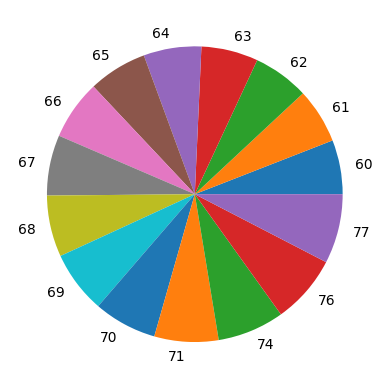

In [147]:
plt.pie(x2,labels=x2)
plt.show()

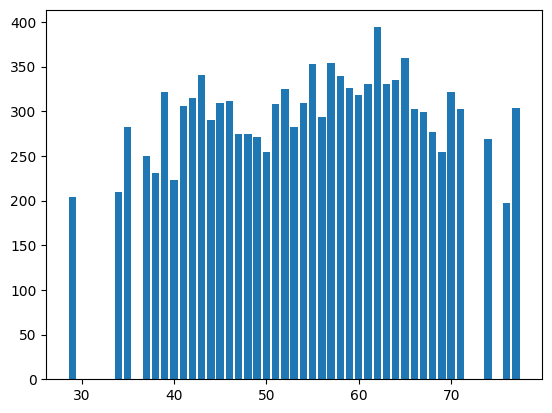

In [148]:
plt.bar(df['age'],df['chol'])
plt.show()

In [155]:
x3=df['chol'][:-954]
x3

0     212
1     203
2     174
3     203
4     294
5     248
6     318
7     289
8     249
9     286
10    149
11    341
12    210
13    298
15    210
Name: chol, dtype: int64

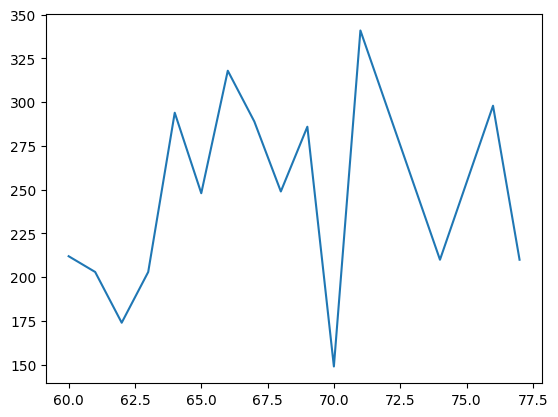

In [156]:
plt.plot(x2,x3)
plt.show()

In [170]:
x3=[]
for m in df['age']:
    for c in df['chol']:
        if (m>=60):
            x3.append(c)

x3

[212,
 203,
 174,
 203,
 294,
 248,
 318,
 289,
 249,
 286,
 149,
 341,
 210,
 298,
 210,
 308,
 266,
 244,
 211,
 185,
 223,
 208,
 252,
 209,
 307,
 233,
 319,
 256,
 327,
 169,
 244,
 131,
 269,
 196,
 231,
 213,
 271,
 263,
 229,
 360,
 258,
 330,
 249,
 342,
 226,
 203,
 228,
 278,
 230,
 283,
 241,
 188,
 193,
 245,
 212,
 232,
 204,
 278,
 299,
 212,
 204,
 288,
 197,
 315,
 215,
 326,
 207,
 249,
 177,
 256,
 257,
 255,
 187,
 201,
 201,
 233,
 149,
 231,
 215,
 220,
 211,
 249,
 268,
 193,
 267,
 209,
 187,
 169,
 208,
 236,
 303,
 282,
 248,
 197,
 213,
 126,
 309,
 257,
 186,
 275,
 299,
 281,
 223,
 206,
 197,
 226,
 256,
 335,
 218,
 307,
 254,
 177,
 204,
 295,
 309,
 169,
 282,
 260,
 240,
 302,
 197,
 192,
 240,
 256,
 203,
 196,
 309,
 225,
 342,
 325,
 257,
 235,
 274,
 197,
 234,
 182,
 204,
 167,
 295,
 172,
 298,
 321,
 318,
 300,
 258,
 330,
 309,
 199,
 258,
 157,
 304,
 222,
 304,
 274,
 249,
 326,
 184,
 354,
 315,
 160,
 247,
 283,
 240,
 199,
 239,
 283,
 246

In [171]:
x3=np.array(x3)
x3=np.unique(x3)
x3

array([126, 131, 141, 149, 157, 160, 166, 167, 168, 169, 172, 174, 175,
       176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193,
       195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278,
       281, 282, 283, 284, 286, 288, 289, 290, 293, 294, 295, 298, 299,
       300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 313, 315, 318,
       319, 321, 322, 325, 326, 327, 330, 335, 340, 341, 342, 353, 354,
       360, 394])

<AxesSubplot:>

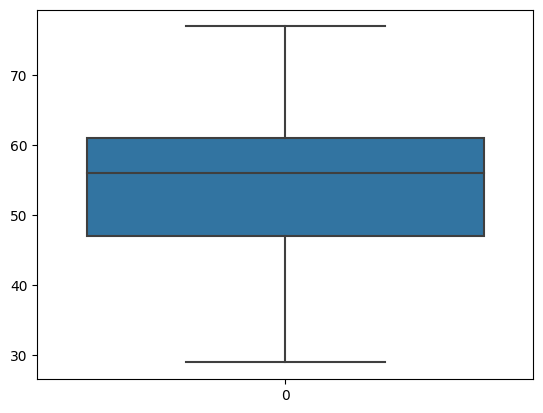

In [161]:
sns.boxplot(df['age'])

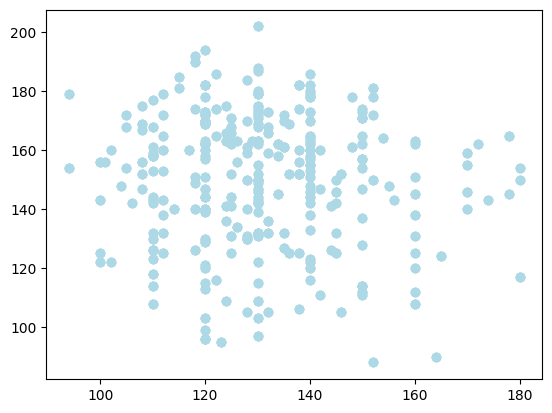

In [169]:
plt.scatter(df['trestbps'],df['thalach'],color='lightblue')

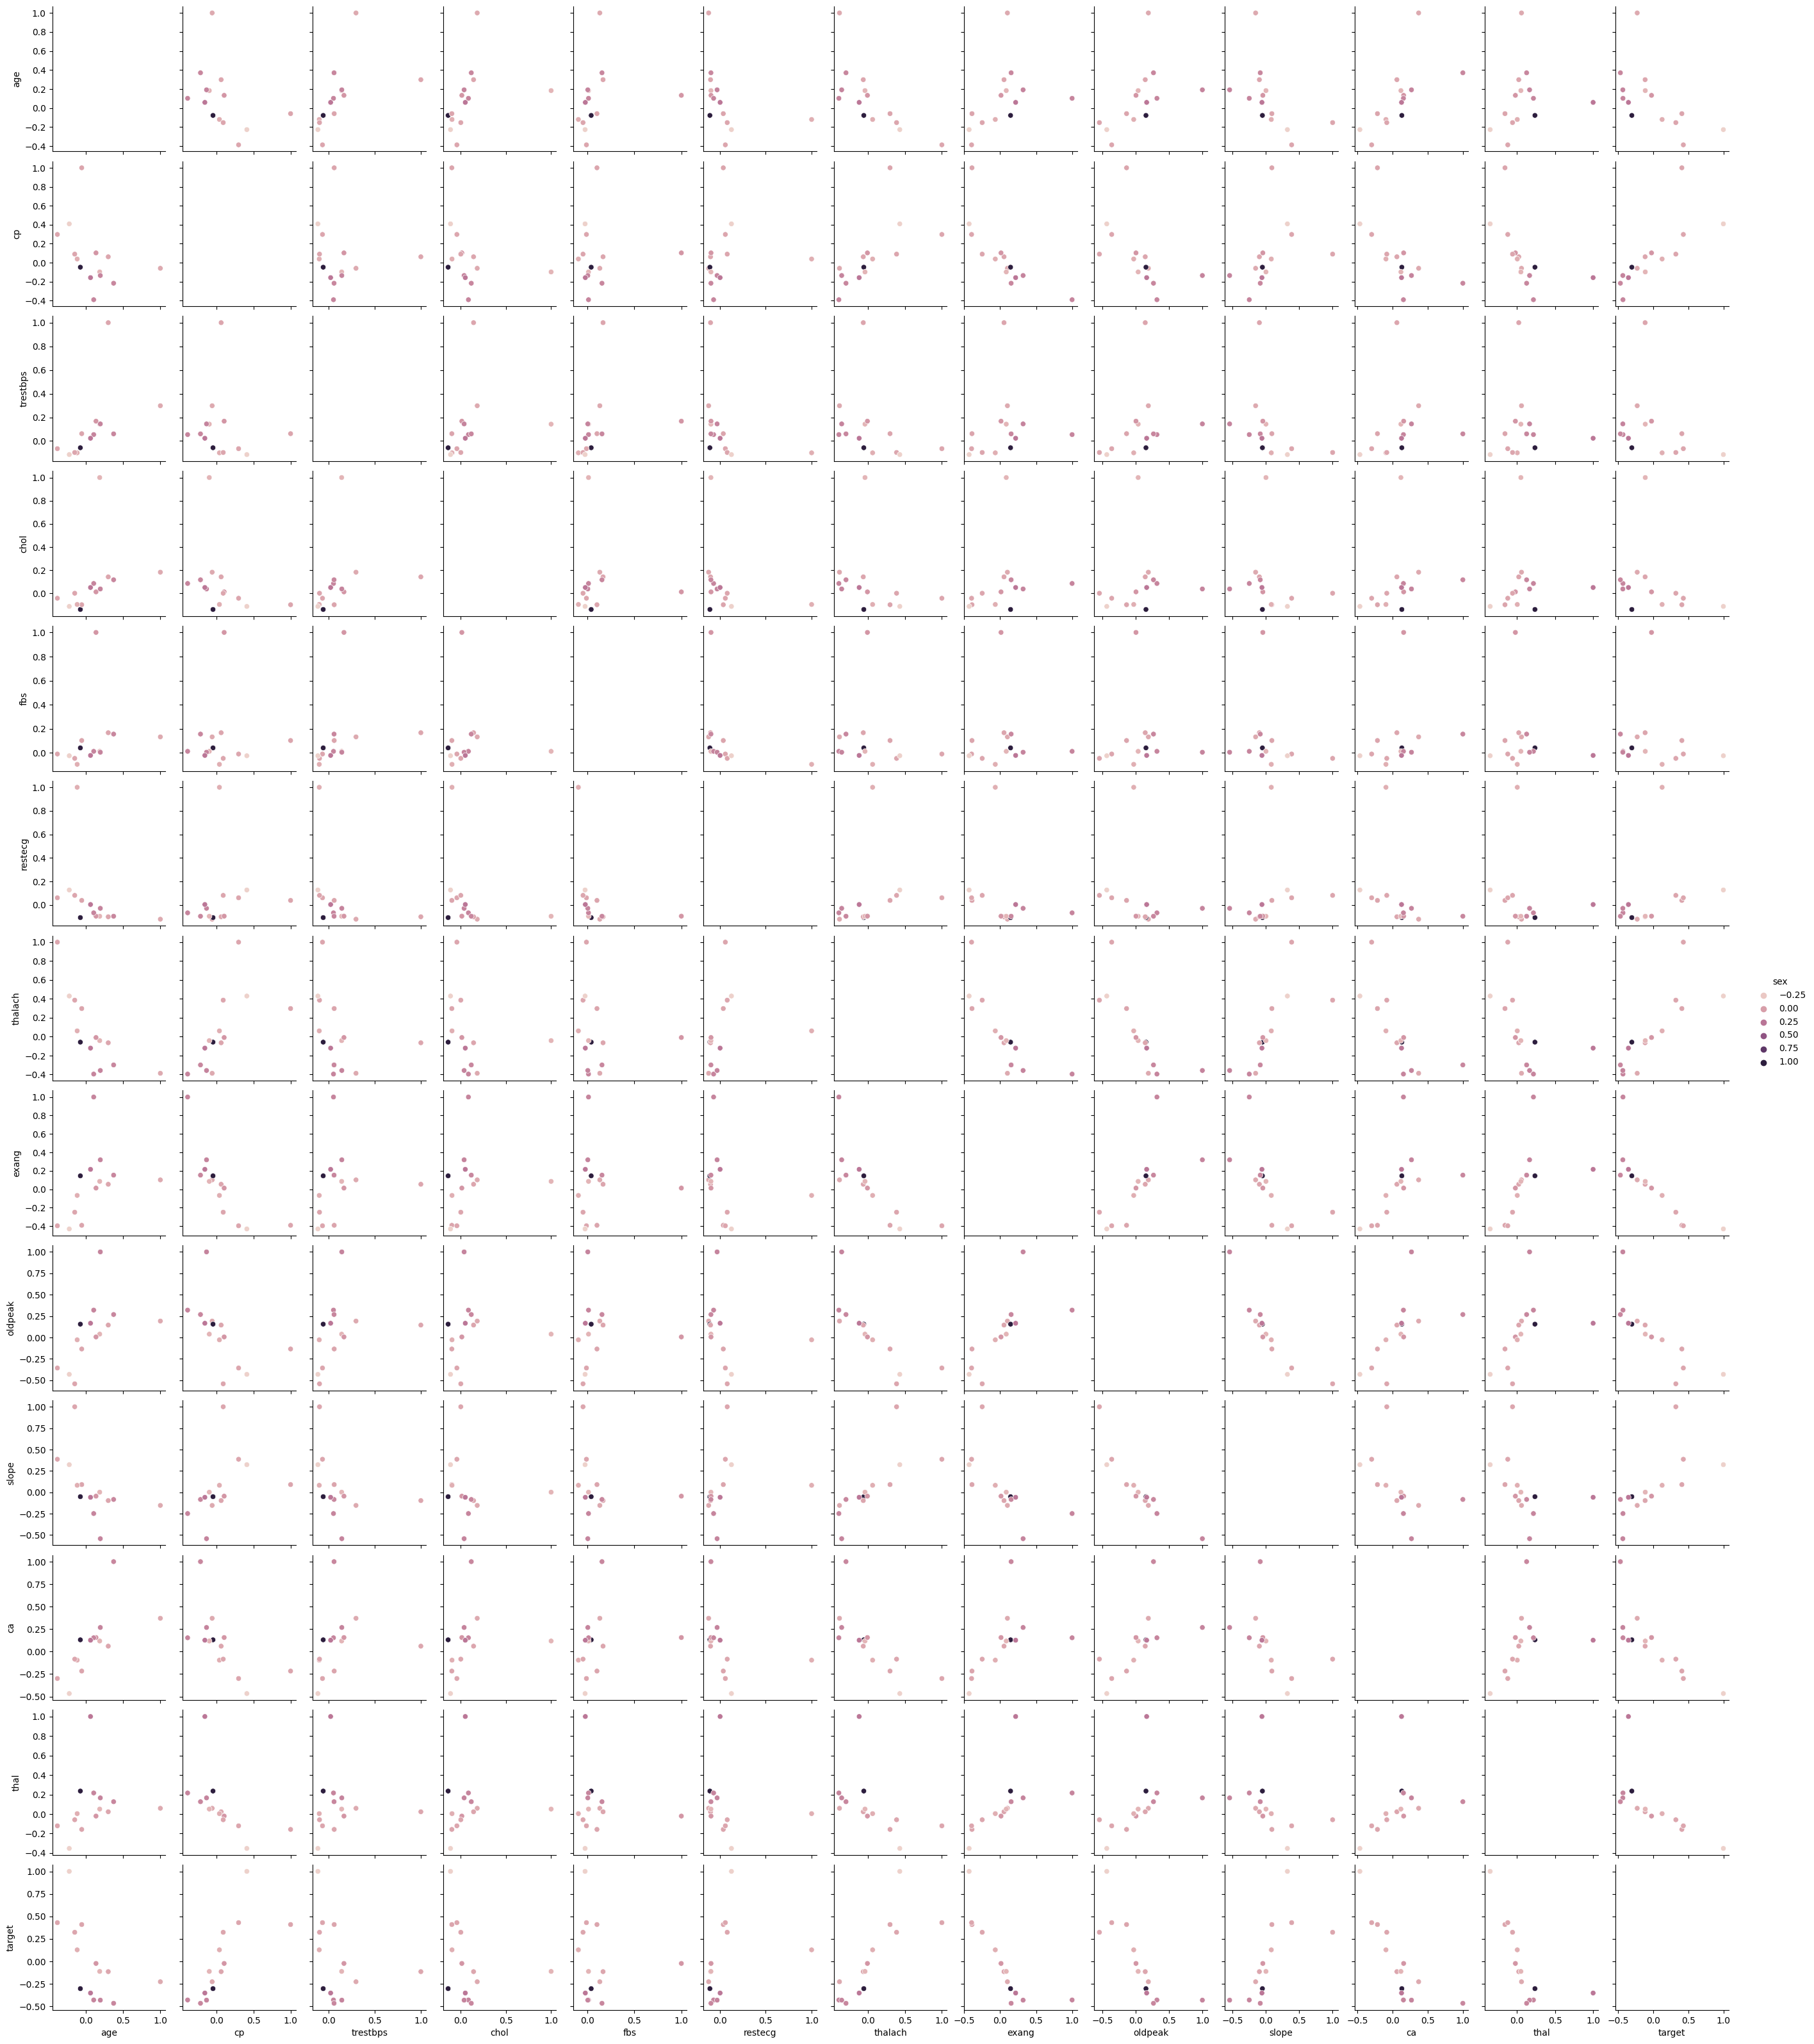

In [163]:
sns.pairplot(df.corr(),aspect=0.85,hue='sex')